## Day 6

https://adventofcode.com/2024/day/6#part2

In [1]:
from collections import defaultdict

def read_input_06(filename):
    f = open(filename)
    m = defaultdict(str)
    g = 0
    im = 0+1j # imaginary unit
    for j,l in enumerate(f.readlines()):
        for i,c in enumerate(l.strip()):
            p = i+j*im # coordinate as complex number
            if c=="^": # guard location
                g = p
                m[p] = "." # replace guard initial position with an empty space
            else:
                m[p] = c
    return m, g

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from celluloid import Camera

def explore_map(m, g, saveAnimation=False):
    im = 0+1j # imaginary unit
    t = im # multiply to get +90 degrees turn
    d = -im # initial direction (facing upward)
    pos = {g} # guard visited positions 
    posdir = {(g,d)} # guard visited positions and directions to identify loops for part 2)

    if saveAnimation:
        cmap_room = matplotlib.colors.ListedColormap(['black','brown', 'dimgray', 'red'])
        room = np.zeros( (max([int(p.imag) for p in m.keys()])+1,max([int(p.real) for p in m.keys()])+1),dtype=int)
        for p in m.keys():
            if m[p]=="#":
               room[int(p.imag),int(p.real)]=1
        f = plt.figure(figsize=(4,4),dpi=100)
        ax = f.add_axes([0, 0, 1, 1])
        ax.axis('off')
        camera = Camera(f)
    
    while True:
        g1 = g + d
        if m[g1]==".":
            
            if saveAnimation:
                room[int(g1.imag),int(g1.real)]=3
                room[int(g.imag),int(g.real)]=2
                plt.imshow(room,cmap=cmap_room)
                camera.snap()
            
            # check for loops (again in same position with same direction)
            if (g1,d) in posdir:                
                return -1
            pos.add(g1)
            posdir.add((g1,d))
            g = g1
        elif m[g1]=="#":
            d *= t
        elif m[g1]=="": # exit map
            if saveAnimation:
                return camera
            else:
                return pos

def part1(filename):
    m, g = read_input_06(filename)
    return len(explore_map(m, g))

In [3]:
print("Test 1:",part1("examples/example06.txt"))
print("Part 1:",part1("AOC2024inputs/input06.txt"))

Test 1: 41
Part 1: 4964


In [4]:
def part2(filename,checkAll=False):
    m, g = read_input_06(filename)
    loops = 0
    tiles = []
    if checkAll:
        tiles = list(m.keys()) # obstacles in all free positions in map
    else:
        pos = explore_map(m, g) # run part 1 to get covered path
        tiles = list(pos) # obstacles in guard path
    for i,p in enumerate(tiles): # place obstacles
        if i!=0 and i%1000==0:
            print(f"Processed {i}/{len(tiles)} obstacle positions...")
        if m[p]!="#":
            m[p]="#" # place obstacle in position
            o = explore_map(m, g)
            if o==-1:
                loops +=1
            m[p]="." # restore original map
    return loops

In [5]:
print("Test 2:",part2("examples/example06.txt"))

Test 2: 6


In [6]:
import time
start = time.time()

print("Part 2:",part2("AOC2024inputs/input06.txt",checkAll=True))

stop = time.time()
print(f"Execution time: {stop-start:4.1f} s")

Processed 1000/16900 obstacle positions...
Processed 2000/16900 obstacle positions...
Processed 3000/16900 obstacle positions...
Processed 4000/16900 obstacle positions...
Processed 5000/16900 obstacle positions...
Processed 6000/16900 obstacle positions...
Processed 7000/16900 obstacle positions...
Processed 8000/16900 obstacle positions...
Processed 9000/16900 obstacle positions...
Processed 10000/16900 obstacle positions...
Processed 11000/16900 obstacle positions...
Processed 12000/16900 obstacle positions...
Processed 13000/16900 obstacle positions...
Processed 14000/16900 obstacle positions...
Processed 15000/16900 obstacle positions...
Processed 16000/16900 obstacle positions...
Part 2: 1740
Execution time: 41.0 s


In [7]:
import time
start = time.time()

print("Part 2:",part2("AOC2024inputs/input06.txt",checkAll=False))

stop = time.time()
print(f"Execution time: {stop-start:4.1f} s")

Processed 1000/4964 obstacle positions...
Processed 2000/4964 obstacle positions...
Processed 3000/4964 obstacle positions...
Processed 4000/4964 obstacle positions...
Part 2: 1740
Execution time:  9.5 s


In [8]:
def animation(filename,savename):
    m, g = read_input_06(filename)
    camera = explore_map(m,g,saveAnimation=True)
    anim = camera.animate(blit=True)
    anim.save(savename,writer='pillow')

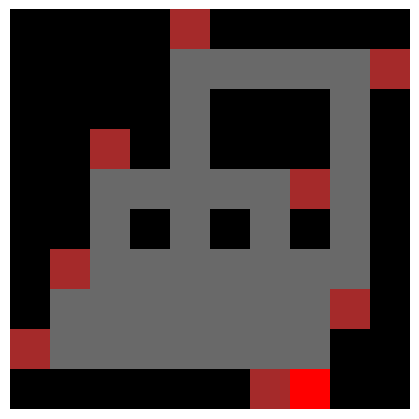

In [9]:
animation("examples/example06.txt",'visualisation/day06animation_example.gif')

![Rocks](visualisation/day06animation_example.gif)

In [ ]:
animation("AOC2024inputs/input06.txt",'visualisation/day06animation_full.gif')

![Rocks](visualisation/day06animation_full.gif)